#**🚨 Before Running the Script Please Make Sure you have selected the Run Time as GPU**

#**Step 01: Installing the Packages**

In [ ]:
%%capture
!pip install super-gradients==3.1.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

In [ ]:
!pip install super_gradients


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 58.7 MB/s eta 0:00:00
  Using cached boto3-1.34.28-py3-none-any.whl (139 kB)
  Using cached Deprecated-1.2.14-py2.py3-none-any.whl (9.6 kB)
  Using cached coverage-5.3.1-cp310-cp310-linux_x86_64.whl
  Using cached Sphinx-4.0.3-py3-none-any.whl (2.9 MB)
  Using cached sphinx_rtd_theme-2.0.0-py2.py3-none-any.whl (2.8 MB)
  Using cached torchmetrics-0.8.0-py3-none-any.whl (408 kB)
  Using cached hydra_core-1.3.2-py3-none-any.whl (154 kB)
  Using cached omegaconf-2.3.0-py3-none-any.whl (79 kB)
  Using cached onnxruntime-1.13.1-cp310-cp310-manylinux_2_27_x86_64.whl (4.5 MB)
  Using cached onnx-1.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Using cached pyparsing-2.4.5-py2.py3-none-any.whl (67 kB)
  Using cached einops-0.3.2-py3-none-any.whl (25 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached treeli

#**🚨 Restart the Run Time**

#**Step 02: Importing all the required libraries**

In [ ]:
from super_gradients.training import Trainer
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

The console stream is logged into /root/sg_logs/console.log


[2024-01-26 11:40:14] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-01-26 11:40:14] WARNING - __init__.py - Failed to import pytorch_quantization
[2024-01-26 11:40:15] INFO - utils.py - NumExpr defaulting to 2 threads.
[2024-01-26 11:40:25] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-01-26 11:40:25] WARNING - export.py - Failed to import pytorch_quantization
[2024-01-26 11:40:25] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [ ]:
from IPython.display import clear_output


In [ ]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback



In [ ]:
from super_gradients.training import models


#**Step 03: Setting the checkpoint directory and experiment name | Instantiated the trainer**

In [ ]:
CHECKPOINT_DIR = 'checkpoints2'
trainer = Trainer(experiment_name='ppe_yolonas_run2', ckpt_root_dir=CHECKPOINT_DIR)

#**Step 04: Exporting the Dataset from Roboflow into the Google Colab Notebook**

In [ ]:

from roboflow import Roboflow
rf = Roboflow(api_key="BJTWjNUNN3IH70t59zGK")
project = rf.workspace("sara-ghazi-qj73m").project("bt-cohqx")
dataset = project.version(1).download("yolov5")




loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to BT-1 in yolov5pytorch::   0%|          | 0/426 [00:00<?, ?it/s]

Extracting Dataset Version Zip to BT-1 in yolov5pytorch:: 100%|██████████| 426/426 [00:00<00:00, 7654.33it/s]


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from glob import glob

# folders = glob('/content/drive/MyDrive/waste/DATASET/TRAIN/*')  # Added '/*' to fetch all files/folders within TRAIN
# print(len(folders))

2


#**Step 05: Load your dataset parameters into a dictionary**

You'll need to load your dataset parameters into a dictionary, specifically defining:

- path to the parent directory where your data lives
- the child directory names for training, validation, and test (if you have testing set) images and labels
- class names

In [ ]:
dataset_params = {
    'data_dir':'/content/BT-1',
    'train_images_dir':'/content/BT-1/train/images',
    'train_labels_dir':'/content/BT-1/train/labels',
    'val_images_dir':'/content/BT-1/valid/images',
    'val_labels_dir':'/content/BT-1/valid/labels',
    'test_images_dir':'/content/BT-1/test/images',
    'test_labels_dir':'/content/BT-1/test/labels',
    'classes': ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
}


In [ ]:
# dataset_params = {
#     'data_dir': '/content/drive/MyDrive/waste/DATASET',
#     'train_images_dir': '/content/drive/MyDrive/waste/DATASET/TRAIN',
#     #'train_labels_dir': None,  # Assuming you don't have labels for training set
#     'test_images_dir': '/content/drive/MyDrive/waste/DATASET/TEST',
#     #'test_labels_dir': None,  # Assuming you don't have labels for test set
#     'classes': ['O', 'R']
# }


#**Step 06: Pass the values for `dataset_params` into the `dataset_params` argument as shown below.**

In [ ]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

clear_output()

Indexing dataset annotations: 100%|██████████| 21/21 [00:00<00:00, 4902.34it/s]


#**Step 07: Inspect the Dataset Defined Earlier**

In [ ]:
train_data.dataset.transforms

In [ ]:
train_data.dataset.dataset_params['transforms'][1]

{'DetectionRandomAffine': {'degrees': 10.0, 'translate': 0.1, 'scales': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'filter_box_candidates': True, 'wh_thr': 2, 'area_thr': 0.1, 'ar_thr': 20}}

In [ ]:
train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees'] = 10.42

#**Step 08: Plot a batch of training data with their augmentations applied to see what they look like**

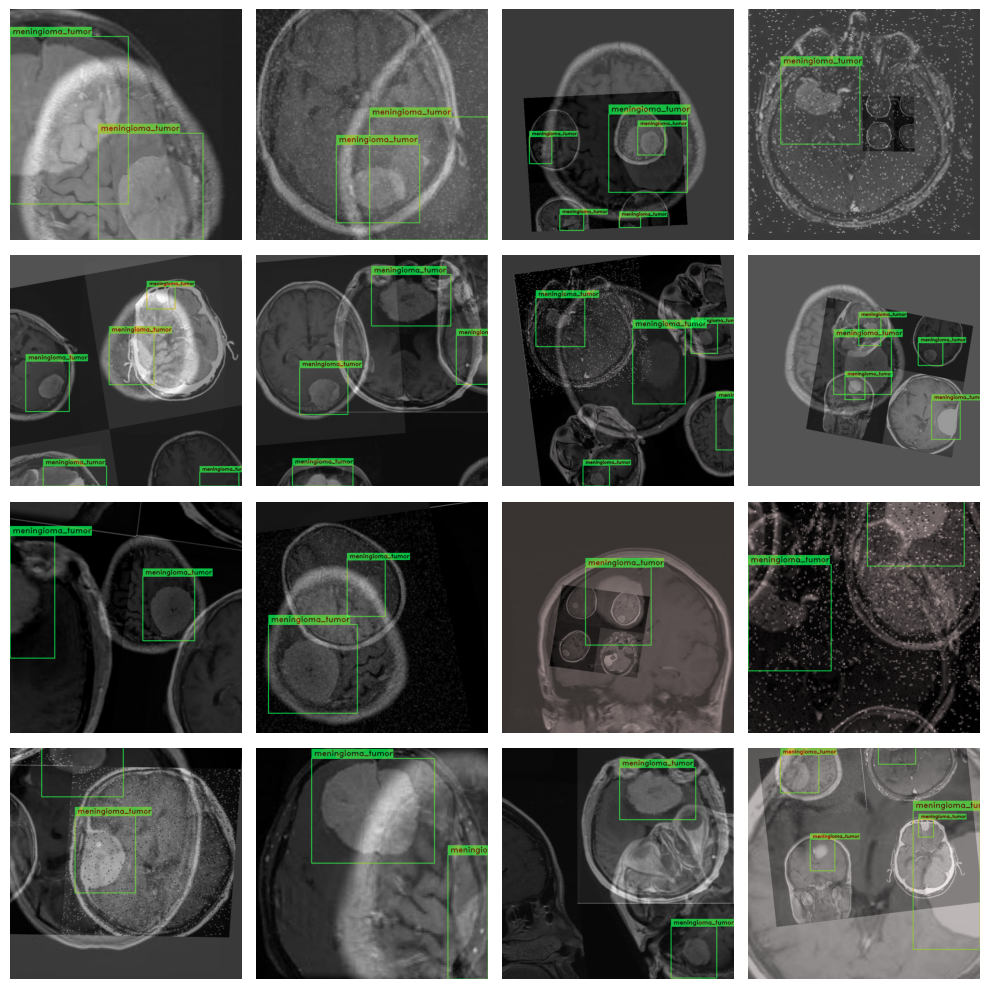

In [ ]:
train_data.dataset.plot()

#**Step 09: Instantiating the model**


You saw how to instantiate the model for inference earlier.

Below is how to instantiate the model for finetuning. Note you need to add the `num_classes` argument here.

Note, for this tutorial we are using `yolo_nas_s`, but SuperGradients has two other flavors of YOLONAS available to you: `yolo_nas_m` and `yolo_nas_l`.

In [ ]:
model = models.get('yolo_nas_l',
                   num_classes=len(dataset_params['classes']),
                   pretrained_weights="coco"
                   )

[2024-01-26 11:53:45] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:05<00:00, 52.9MB/s]
[2024-01-26 11:53:51] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


#**Step 10: 📊 Define metrics and training parameters**


We need to define the training parameters for your training run.

Full details about the training parameters can be found [here](https://github.com/Deci-AI/super-gradients/blob/master/src/super_gradients/recipes/training_hyperparams/default_train_params.yaml).


### 🚨 There are a few **mandatory** arguments that we must define for training params 🚨

- `max_epochs` - Max number of training epochs

- `loss` - the loss function you want to use

- `optimizer` - Optimizer you will be using

- `train_metrics_list` - Metrics to log during training

- `valid_metrics_list` - Metrics to log during training

- `metric_to_watch` - metric which the model checkpoint will be saved according to

We can choose from a variety of `optimizer`'s such as: Adam, AdamW, SGD, Lion, or RMSProps. If you choose to change the defualt parameters of these optimizrs you pass them into `optimizer_params`.


In [ ]:
train_params = {
    # ENABLING SILENT MODE
    'silent_mode': True,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 20,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

#**Step 11: Download the Demo Videos**

In [ ]:
trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)

[2024-01-26 11:55:10] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20240126_115510_069803`
[2024-01-26 11:55:10] INFO - sg_trainer.py - Checkpoints directory: checkpoints2/ppe_yolonas_run2/RUN_20240126_115510_069803
[2024-01-26 11:55:10] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})


The console stream is now moved to checkpoints2/ppe_yolonas_run2/RUN_20240126_115510_069803/console_Jan26_11_55_10.txt


[2024-01-26 11:55:15] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:            145        (len(train_set))
    - Batch size per GPU:           16         (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             16         (num_gpus * batch_size)
    - Effective Batch size:         16         (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         9          (len(train_loader))
    - Gradient updates per epoch:   9          (len(train_loader) / batch_accumulate)
    - Model: YoloNAS_L  (66.91M parameters, 66.91M optimized)
    - Learning Rates and Weight Decays:
      - default: (66.91M parameters). LR: 0.0005 (66.91M parameters) WD: 0.0, (84.70K parameters), WD: 0.0001, (66.82M parameters)

[2024-01-26 11:55:42] INFO - base_sg_logger.py - Checkpoint saved i

#**Step 13: 🏆 Get the best trained model**

In [ ]:
best_model = models.get('yolo_nas_l',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="/content/checkpoints2/ppe_yolonas_run2/RUN_20240126_115510_069803/ckpt_best.pth")

[2024-01-26 12:22:24] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/checkpoints2/ppe_yolonas_run2/RUN_20240126_115510_069803/ckpt_best.pth EMA checkpoint.


In [ ]:
import os

file_path = '/content/checkpoints2/ppe_yolonas_run2/ckpt_latest.pth'
if os.path.exists(file_path):
    print(f"The file {file_path} exists!")
else:
    print(f"The file {file_path} does NOT exist!")



The file /content/checkpoints2/ppe_yolonas_run2/ckpt_latest.pth exists!


In [ ]:
from IPython.display import display, FileLink

local_file_path = "/content/checkpoints2/ppe_yolonas_run2/ckpt_latest.pth"
display(FileLink(local_file_path))


/content/checkpoints2/ppe_yolonas_run2/ckpt_latest.pth

#**Step 14: 🧐 Evaluating the best trained model on the test set**

In [ ]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1,
                                                   top_k_predictions=300,
                                                   num_cls=len(dataset_params['classes']),
                                                   normalize_targets=True,
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,
                                                                                                          nms_top_k=1000,
                                                                                                          max_predictions=300,
                                                                                                          nms_threshold=0.7)
                                                  ))

Testing:  50%|█████     | 1/2 [00:01<00:01,  1.31s/it]

{'PPYoloELoss/loss_cls': 0.8181094,
 'PPYoloELoss/loss_iou': 0.48622772,
 'PPYoloELoss/loss_dfl': 0.6771974,
 'PPYoloELoss/loss': 1.9815344,
 'Precision@0.50': 0.036764707416296005,
 'Recall@0.50': 0.5,
 'mAP@0.50': 0.48797738552093506,
 'F1@0.50': 0.06849315762519836,
 'Best_score_threshold': 0.429999977350235}

Testing: 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]
